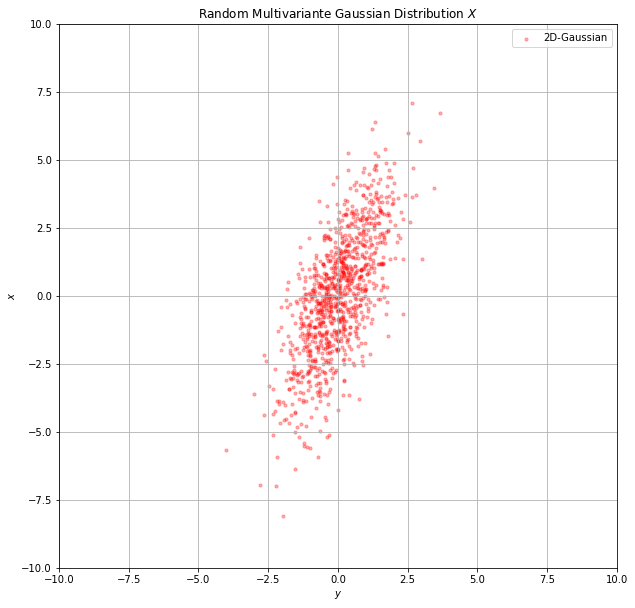

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# This is similar to the code from lecture 1
# to sample from a 2D Gaussian Distribution
mean = [0,0]
cov = [[1, 1.5], [1.5, 5]]
# Fix random seed to get consistent results
np.random.seed(1024)
X = np.random.multivariate_normal(mean, cov, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
# Set x/y axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title('Random Multivariante Gaussian Distribution $X$')
ax.set_ylabel('$x$')
ax.set_xlabel('$y$')
fig.show()
plt.savefig('graph_3_a.png')

In [13]:
# TODO: Report the estimate mean and covariance
# of the sampled points

mean = np.mean(X, axis=0)
cov = np.cov(X)

print('Mean of X:\n', mean, '\n')
print('Covariance of X:\n', cov)

Mean of X:
 [0.0104783  0.06124546] 

Covariance of X:
 [[4.27808445 2.40991407 2.05275031 ... 2.97926342 2.1962627  3.06908942]
 [2.40991407 1.35754352 1.1563474  ... 1.6782672  1.23719025 1.72886764]
 [2.05275031 1.1563474  0.98496976 ... 1.42953791 1.05383122 1.47263906]
 ...
 [2.97926342 1.6782672  1.42953791 ... 2.07476281 1.52948012 2.13731776]
 [2.1962627  1.23719025 1.05383122 ... 1.52948012 1.12750693 1.57559457]
 [3.06908942 1.72886764 1.47263906 ... 2.13731776 1.57559457 2.20175875]]


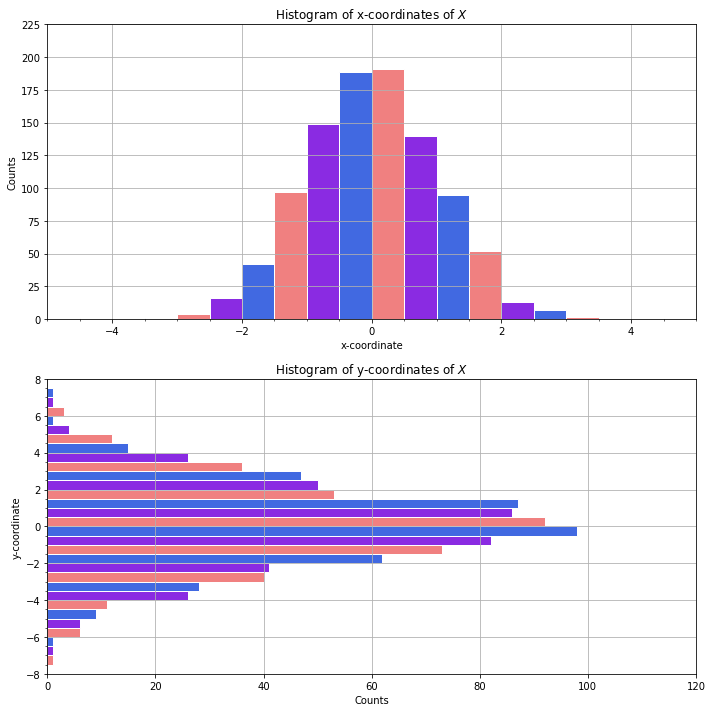

In [14]:
# TODO: Plot the histogram for the x-coordinates of X
# and y-coordinates of X respectively.
# You can use the plt.hist() function

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

bin_width = 0.5

bin_range = np.arange(-5, 5, bin_width)
N_x, bins_x, patches = ax[0].hist(X[:,0], bins=bin_range, edgecolor='white')

for i in range(0, len(patches)):
    if i % 3 == 0:
        patches[i].set_facecolor('royalblue')
    if i % 3 == 1:
        patches[i].set_facecolor('lightcoral')
    if i % 3 == 2:
        patches[i].set_facecolor('blueviolet')


ax[0].grid()
ax[0].set_xlim([-5, 5])
ax[0].set_ylim([0, 225])
ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0].set_title('Histogram of x-coordinates of $X$')
ax[0].set_xlabel('x-coordinate')
ax[0].set_ylabel('Counts')

bin_range = np.arange(-8, 8, 0.5)
N_y, bins_y, patches = ax[1].hist(X[:,1], bins=bin_range, edgecolor='white', orientation='horizontal')

for i in range(0, len(patches)):
    if i % 3 == 0:
        patches[i].set_facecolor('royalblue')
    if i % 3 == 1:
        patches[i].set_facecolor('lightcoral')
    if i % 3 == 2:
        patches[i].set_facecolor('blueviolet')

ax[1].grid()
ax[1].set_ylim([-8, 8])
ax[1].set_xlim([0, 120])
ax[1].yaxis.set_minor_locator(MultipleLocator(0.5))
ax[1].set_title('Histogram of y-coordinates of $X$')
ax[1].set_ylabel('y-coordinate')
ax[1].set_xlabel('Counts')

fig.tight_layout()
fig.show()
plt.savefig('graph_3_b.png')

Estimated mean of x-coordinates of X:
 0.013
Estimated variance of x-coordinates of X:
 1.0678310000000004 

Estimated mean of y-coordinates of X:
 0.07325
Estimated variance of y-coordinates of X:
 5.0320665719374995 



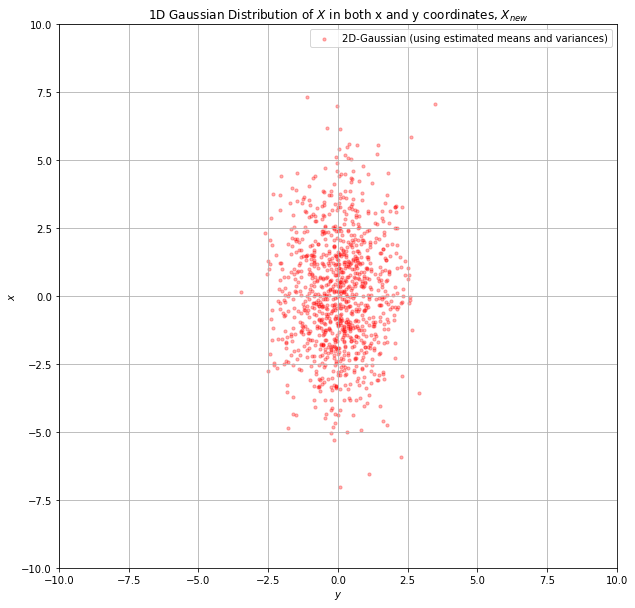

In [15]:
# TODO: Are the x-coordinates of X samples from
# some Gaussian distribution?
# If so, estimate the mean and variance.
# Do the same for the y-coordinates.

mean_estimate_x = 0

for i in range(np.size(N_x)):
    mean_estimate_x += N_x[i] * (bins_x[i+1] + bins_x[i]) / 2

mean_estimate_x /= 1000

variance_x = 0

for i in range(np.size(N_x)):
    variance_x += N_x[i] * ((bins_x[i+1] + bins_x[i]) / 2 - mean_estimate_x)**2

variance_x /= 1000

print('Estimated mean of x-coordinates of X:\n', mean_estimate_x)
print('Estimated variance of x-coordinates of X:\n', variance_x, '\n')

mean_estimate_y = 0

for i in range(np.size(N_y)):
    mean_estimate_y += N_y[i] * (bins_y[i+1] + bins_y[i]) / 2

mean_estimate_y /= 1000

variance_y = 0

for i in range(np.size(N_y)):
    variance_y += N_y[i] * ((bins_y[i+1] + bins_y[i]) / 2 - mean_estimate_y)**2

variance_y /= 1000

print('Estimated mean of y-coordinates of X:\n', mean_estimate_y)
print('Estimated variance of y-coordinates of X:\n', variance_y, '\n')

# TODO: Generate a new 2D scatter plot of 1000 points,
# such that the x-coordinates(y-coordinates) of all the points
# are samples from a 1D Gaussian distribution 
# using the estimated mean and variance based on the x-coordinates(y-coordinates) of X.

x_new = np.random.normal(mean_estimate_x, np.sqrt(variance_x), size=1000)
y_new = np.random.normal(mean_estimate_y, np.sqrt(variance_y), size=1000)

X_new = np.array([x_new, y_new]).transpose()

fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X_new[:,0], X_new[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian (using estimated means and variances)")
ax.grid()
ax.legend(loc = 0)
# Set x/y axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title('1D Gaussian Distribution of $X$ in both x and y coordinates, $X_{new}$')
ax.set_ylabel('$x$')
ax.set_xlabel('$y$')
fig.show()
plt.savefig('graph_3_d.png')

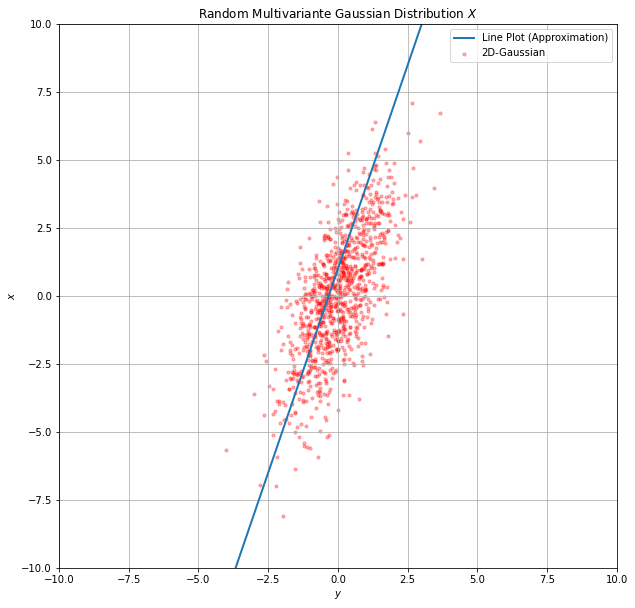

In [16]:
# Back to the original X
fig, ax = plt.subplots(figsize=(10, 10))
# c='r', dot color is red
# s=10.0, dot size is 10
# alpha=0.3, dot opacity is 0.3
ax.scatter(X[:,0], X[:,1], c='r', s=10.0, alpha=0.3, label="2D-Gaussian")
ax.grid()
ax.legend(loc = 0)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# TODO: Plot a line segment with x = [-10, 10]
# and y = 3x + 1 onto the 2D-Gaussian plot.
# The np.linspace() function may be helpful.
x = np.linspace(-10, 10, num=100)
y = 3*x + 1

ax.plot(x, y, label='Line Plot (Approximation)', linewidth=2)
ax.legend(loc = 0)
ax.set_title('Random Multivariante Gaussian Distribution $X$')
ax.set_ylabel('$x$')
ax.set_xlabel('$y$')
fig.show()

plt.savefig('graph_3_e.png')

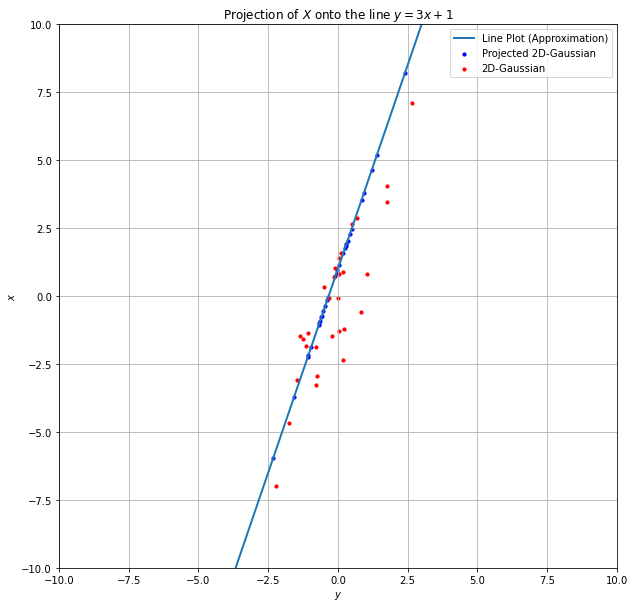

In [17]:
# TODO: Project X onto line y=3x + 1
# and plot the projected points on the 2D space.
# You need to remove this line and assign the projected points to X_proj.
y_origin = np.array([[0, 1]])
y_vector = np.array([[1, 3]])
X_proj = (X.dot(np.transpose(y_vector)) / y_vector.dot(np.transpose(y_vector))).dot(y_vector) + y_origin
#X_proj = temp.dot(y_vector)

# Here we only plot 30 points to check the correctness
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_proj[:30,0], X_proj[:30,1], c='b', s=10.0, alpha=1.0, label="Projected 2D-Gaussian")
ax.scatter(X[:30,0], X[:30,1], c='r', s=10.0, alpha=1.0, label="2D-Gaussian")
ax.grid()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

# You can also add the line from the previous plot for verification.
x = np.linspace(-10, 10, num=100)
y = 3*x + 1
ax.plot(x, y, label='Line Plot (Approximation)', linewidth=2)
ax.legend(loc = 0)
ax.set_title('Projection of $X$ onto the line $y=3x+1$')
ax.set_ylabel('$x$')
ax.set_xlabel('$y$')
fig.show()
plt.savefig('graph_3_e_2.png')

Estimated mean of x-coordinates of X_proj:
 0.015
Estimated variance of x-coordinates of X_proj:
 0.589279 



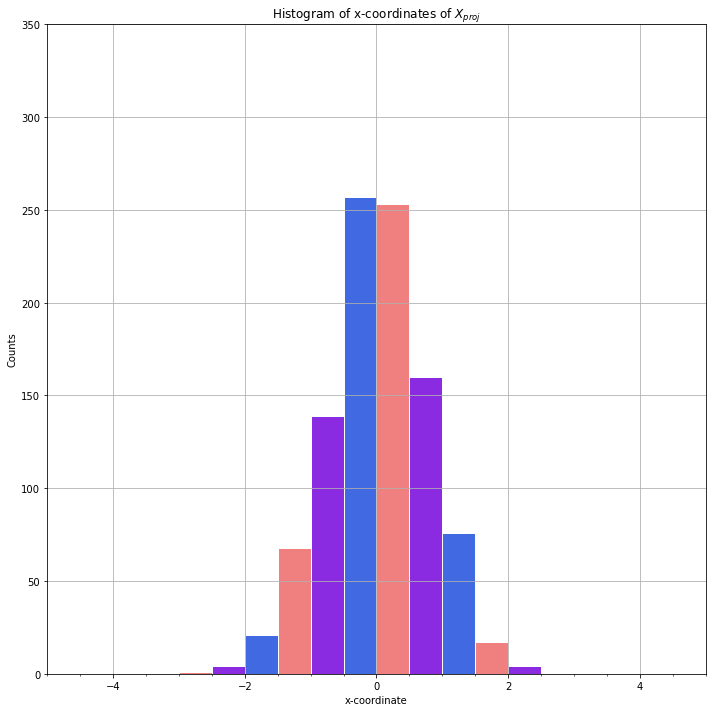

In [18]:
# TODO: Draw the histogram of the x-coordinates
# of the projected points.
# Are the x-coordinates of the projected points
# samples from some Gaussian distribution?
# If so, estimate the mean and variance.

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

bin_width = 0.5

bin_range = np.arange(-5, 5, bin_width)
N_x, bins_x, patches = ax.hist(X_proj[:,0], bins=bin_range, edgecolor='white')

for i in range(0, len(patches)):
    if i % 3 == 0:
        patches[i].set_facecolor('royalblue')
    if i % 3 == 1:
        patches[i].set_facecolor('lightcoral')
    if i % 3 == 2:
        patches[i].set_facecolor('blueviolet')

ax.grid()
ax.set_xlim([-5, 5])
ax.set_ylim([0, 350])
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_title('Histogram of x-coordinates of $X_{proj}$')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('Counts')

fig.tight_layout()
fig.show()

mean_estimate_x_proj = 0

for i in range(np.size(N_x)):
    mean_estimate_x_proj += N_x[i] * (bins_x[i+1] + bins_x[i]) / 2

mean_estimate_x_proj /= 1000

variance_x_proj = 0

for i in range(np.size(N_x)):
    variance_x_proj += N_x[i] * ((bins_x[i+1] + bins_x[i]) / 2 - mean_estimate_x)**2

variance_x_proj /= 1000

print('Estimated mean of x-coordinates of X_proj:\n', mean_estimate_x_proj)
print('Estimated variance of x-coordinates of X_proj:\n', variance_x_proj, '\n')
plt.savefig('graph_3_f.png')